# Exploração Inicial

Ciência e Visualização de Dados em Saúde (2021.1)

UNICAMP - Universidade Estadual de Campinas

Daniel Alvarenga Fernandes, 190943 (Saúde/FCM) \\
Giovane William de Souza Gomes, 093801 (Computação/FEEC) \\
Guilherme Paulino, 117119 (Computação/FEEC) \\
Stephane de Freitas Schwarz, 211518 (Computação/IC)

---

## Informações iniciais


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root = 'drive/Shareddrives/MO286 - Visualização de Dados/data_csv/'
!ls 'drive/Shareddrives/MO286 - Visualização de Dados/data_csv/'

backup	     mapeamento_nomes.csv  s1.csv  s3.csv  s5.csv  s7.csv  s9.csv
columns.csv  raw_sheets		   s2.csv  s4.csv  s6.csv  s8.csv


In [ ]:
!pip install -U pandas-profiling 

     |████████████████████████████████| 256kB 14.1MB/s 
     |████████████████████████████████| 112kB 24.6MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 645kB 22.4MB/s 
     |████████████████████████████████| 10.1MB 25.0MB/s 
     |████████████████████████████████| 1.1MB 41.4MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 3.1MB 45.1MB/s 
     |████████████████████████████████| 296kB 65.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=4d551b0651512da9fb67c075e24e28861cb5784c4faac0bd19bfe940f02101bf
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=2daa86cb97abaaf3ffd677906dd229d2ea1071a2e651564c3d7b3bdae3e7a203
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85

In [ ]:
# Importação de pacotes
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from pandas_profiling import ProfileReport

## Funções úteis

In [ ]:
def show_matrix_corr(dataset, method):

  correlation = dataset.corr(method=method)
  _, _ = plt.subplots(figsize=(12, 9))
  sns.heatmap(correlation, vmax=1, square=True, annot=True)
  plt.title('Matriz de correlação - Coeficiente de {}'.format(method))
  plt.show()

  return correlation

In [ ]:
class bcolors:
    low = '\033[30m'
    moderate = '\033[94m'
    high = '\033[92m'


def plot_correlation_by_classification(dataset, matrix_corr, method='pearson', cl='high', title='Fortemente correlacionados', target='invasao_microvascular'):

  data = dataset
  i_idx = []
  j_idx = []

  if method == 'pearson':
    get_p_value = scipy.stats.pearsonr

  else:
    get_p_value = scipy.stats.spearmanr

  features = list(matrix_corr)

  for i in range(1, matrix_corr.shape[0]):

    for j in range(0, i):      

      if cl=='moderate' and ((np.abs(matrix_corr.iloc[i, j]) < 0.3) or (np.abs(matrix_corr.iloc[i, j]) > 0.7)):
        continue

      elif (cl=='high' and np.abs(matrix_corr.iloc[i, j]) < 0.7):
        continue

      elif (cl=='low' and np.abs(matrix_corr.iloc[i, j]) > 0.3):
        continue

      i_idx.append(i)
      j_idx.append(j)

  
  print('Features {} correlacionadas'.format(title))
  
  for idx, (i, j) in enumerate(zip(i_idx, j_idx)):
    text = '{} e {}'.format(features[i], features[j])

    if ((features[i]==target) or (features[j]==target)):
      print(f'{bcolors.moderate}{text}')

    else:
      print(f'{bcolors.low}{text}')


## Setembro de 2018

In [ ]:
# Abrir todos os dados
dataset = pd.read_csv(root+'s5.csv')
print('Quantidade total de features: {}'.format(len(list(dataset))))

Quantidade total de features: 18


In [ ]:
dataset.head()

num_nod  delta_tc_tx_dias  ... causa_hepatopatia  paciente_id
0      N1                66  ...                 6           88
1      N2                66  ...                 6           88
2      N3                66  ...                 6           88
3      N4               170  ...                 1            6
4      N6               170  ...                 1            6

[5 rows x 18 columns]

#### 1) Analisar dados faltantes

In [ ]:
# Dados faltantes em todas as linhas da coluna
missing_data = dataset.columns[dataset.isna().all()]

print('Colunas onde todos os dados estão faltando:', *missing_data, sep='\n- ')

Colunas onde todos os dados estão faltando:


In [ ]:
# Remover colunas onde todos os valores são nulos

dataset.dropna(axis=1, how='all', inplace=True)
dataset.head()

num_nod  delta_tc_tx_dias  ... causa_hepatopatia  paciente_id
0      N1                66  ...                 6           88
1      N2                66  ...                 6           88
2      N3                66  ...                 6           88
3      N4               170  ...                 1            6
4      N6               170  ...                 1            6

[5 rows x 18 columns]

In [ ]:
# Alterando dados de , para .

# dataset.tam_nod_tc_cm = dataset.tam_nod_tc_cm.str.replace(',','.').astype(float)
# dataset.par_portal = dataset.par_portal.str.replace(',','.').astype(float)
# dataset.par_equi = dataset.par_equi.str.replace(',','.').astype(float)
# dataset.ac_arterial = dataset.ac_arterial.str.replace(',','.').astype(float)
# dataset.ac_portal = dataset.ac_portal.str.replace(',','.').astype(float)
# dataset.ac_equi = dataset.ac_equi.str.replace(',','.').astype(float)
# dataset.rwr_portal = dataset.rwr_portal.str.replace(',','.').astype(float)
# dataset.rwr_equi = dataset.rwr_equi.str.replace(',','.').astype(float)
# dataset.aef = dataset.aef.str.replace(',','.').astype(float)

** Podemos usar a função ``dataframe.coluna.codes`` para categorizar as features, no entanto, quis fazer na mão para deixar explícito a modificação feita.

In [ ]:
# dataset.sexo = dataset.sexo.str.replace('M','0').replace('F', '1').astype(int)
# dataset.invasao_microvascular = dataset.invasao_microvascular.str.replace('ausente','0').replace('presente', '1').astype(int)

Mapeamento dos valores do grau histológico do paciente

*   1 $\implies 1$
*   2 $\implies 2$
*   3 $\implies 3$
*   4 $\implies 4$
*   1, 2 $\implies 5$
*   1, 3 $\implies 6$
*   1, 4 $\implies 7$
*   2, 3 $\implies 8$
*   2, 4 $\implies 9$
*   3, 4 $\implies 10$
*   sem grau $\implies 11$
*   quimioembolização $\implies 12$
*   não informado $\implies 44$
*   nan $\implies 44$

In [ ]:
# dataset.grau_histologico = dataset.grau_histologico.replace('sem grau','11').replace('não informado', '44').replace(np.nan, '44')
# dataset.grau_histologico = dataset.grau_histologico.replace('1 e 2', '5').replace('1 e 3', '6').replace('1 e 4', '7')
# dataset.grau_histologico = dataset.grau_histologico.replace('2 e 3', '8').replace('2 e 4', '9').replace('3 e 4', '10')
# dataset.grau_histologico = dataset.grau_histologico.replace('quimioembolização','12').astype(int)

Mapeamento da causa hepatopatia da lesão

*   CRIPTO $\implies 1$
*   OH $\implies 2$
*   OH + VHB $\implies 3$
*   OH + VHC $\implies 4$
*   VHB $\implies 5$
*   VHC $\implies 6$
*   VHC + OH $\implies 7$
*   VHC + VHB $\implies 8$
*   NaN $\implies 44$

In [ ]:
# dataset.causa_hepatopatia = dataset.causa_hepatopatia.replace(np.nan, '44')
# dataset.causa_hepatopatia = dataset.causa_hepatopatia.replace('CRIPTO', '1').replace('OH', '2')
# dataset.causa_hepatopatia = dataset.causa_hepatopatia.replace('OH + VHB', '3').replace('OH + VHC', '4')
# dataset.causa_hepatopatia = dataset.causa_hepatopatia.replace('VHB', '5').replace('VHC', '6')
# dataset.causa_hepatopatia = dataset.causa_hepatopatia.replace('VHC + OH', '7').replace('VHC + VHB', '8').astype(int)

#### 2) Analise de correlação

##### Spearman Correlation

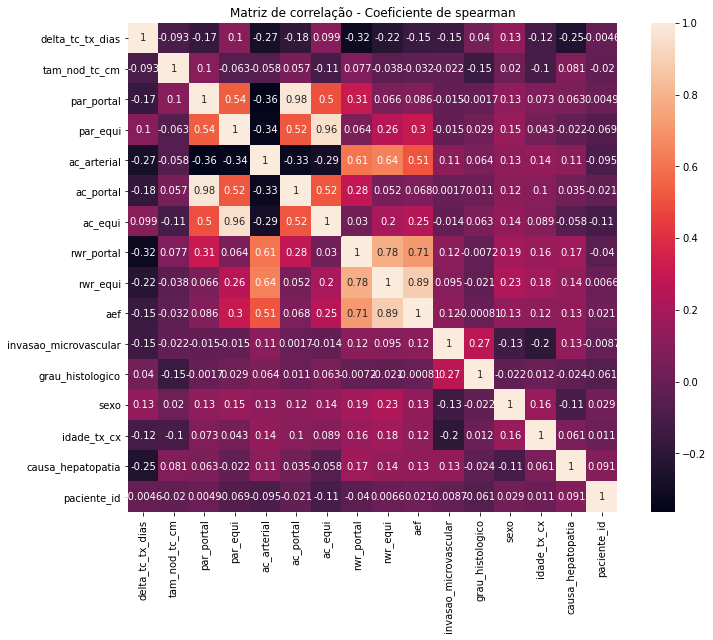

In [ ]:
spearman_correlation = show_matrix_corr(dataset, 'spearman')

In [ ]:
plot_correlation_by_classification(dataset, spearman_correlation, method='spearman', cl='high', title='Fortemente correlacionados', target='invasao_microvascular')

Features Fortemente correlacionados correlacionadas
ac_portal e par_portal
ac_equi e par_equi
rwr_equi e rwr_portal
aef e rwr_portal
aef e rwr_equi


In [ ]:
plot_correlation_by_classification(dataset, spearman_correlation, method='spearman', cl='moderate', title='Moderadamente correlacionados', target='invasao_microvascular')

Features Moderadamente correlacionados correlacionadas
par_equi e par_portal
ac_arterial e par_portal
ac_arterial e par_equi
ac_portal e par_equi
ac_portal e ac_arterial
ac_equi e par_portal
ac_equi e ac_portal
rwr_portal e delta_tc_tx_dias
rwr_portal e par_portal
rwr_portal e ac_arterial
rwr_equi e ac_arterial
aef e par_equi
aef e ac_arterial


In [ ]:
plot_correlation_by_classification(dataset, spearman_correlation, method='spearman', cl='low', title='Fracamente correlacionados', target='invasao_microvascular')

Features Fracamente correlacionados correlacionadas
tam_nod_tc_cm e delta_tc_tx_dias
par_portal e delta_tc_tx_dias
par_portal e tam_nod_tc_cm
par_equi e delta_tc_tx_dias
par_equi e tam_nod_tc_cm
ac_arterial e delta_tc_tx_dias
ac_arterial e tam_nod_tc_cm
ac_portal e delta_tc_tx_dias
ac_portal e tam_nod_tc_cm
ac_equi e delta_tc_tx_dias
ac_equi e tam_nod_tc_cm
ac_equi e ac_arterial
rwr_portal e tam_nod_tc_cm
rwr_portal e par_equi
rwr_portal e ac_portal
rwr_portal e ac_equi
rwr_equi e delta_tc_tx_dias
rwr_equi e tam_nod_tc_cm
rwr_equi e par_portal
rwr_equi e par_equi
rwr_equi e ac_portal
rwr_equi e ac_equi
aef e delta_tc_tx_dias
aef e tam_nod_tc_cm
aef e par_portal
aef e ac_portal
aef e ac_equi
invasao_microvascular e delta_tc_tx_dias
invasao_microvascular e tam_nod_tc_cm
invasao_microvascular e par_portal
invasao_microvascular e par_equi
invasao_microvascular e ac_arterial
invasao_microvascular e ac_portal
invasao_microvascular e ac_equi
invasao_microvascular e rwr_portal
invasao_microvas

##### Pearson Correlation

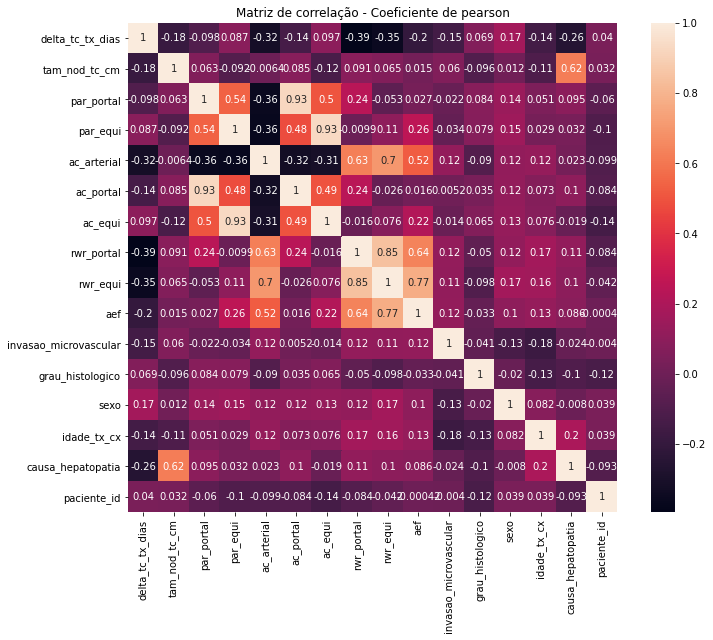

In [ ]:
pearson_correlation = show_matrix_corr(dataset, 'pearson')

In [ ]:
plot_correlation_by_classification(dataset, pearson_correlation, method='pearson', cl='high', title='Fortemente correlacionados', target='invasao_microvascular')

Features Fortemente correlacionados correlacionadas
ac_portal e par_portal
ac_equi e par_equi
rwr_equi e ac_arterial
rwr_equi e rwr_portal
aef e rwr_equi


In [ ]:
plot_correlation_by_classification(dataset, pearson_correlation, method='pearson', cl='moderate', title='Moderadamente correlacionados', target='invasao_microvascular')

Features Moderadamente correlacionados correlacionadas
par_equi e par_portal
ac_arterial e delta_tc_tx_dias
ac_arterial e par_portal
ac_arterial e par_equi
ac_portal e par_equi
ac_portal e ac_arterial
ac_equi e par_portal
ac_equi e ac_arterial
ac_equi e ac_portal
rwr_portal e delta_tc_tx_dias
rwr_portal e ac_arterial
rwr_equi e delta_tc_tx_dias
aef e ac_arterial
aef e rwr_portal
causa_hepatopatia e tam_nod_tc_cm


In [ ]:
plot_correlation_by_classification(dataset, pearson_correlation, method='pearson', cl='low', title='Fracamente correlacionados', target='invasao_microvascular')

Features Fracamente correlacionados correlacionadas
tam_nod_tc_cm e delta_tc_tx_dias
par_portal e delta_tc_tx_dias
par_portal e tam_nod_tc_cm
par_equi e delta_tc_tx_dias
par_equi e tam_nod_tc_cm
ac_arterial e tam_nod_tc_cm
ac_portal e delta_tc_tx_dias
ac_portal e tam_nod_tc_cm
ac_equi e delta_tc_tx_dias
ac_equi e tam_nod_tc_cm
rwr_portal e tam_nod_tc_cm
rwr_portal e par_portal
rwr_portal e par_equi
rwr_portal e ac_portal
rwr_portal e ac_equi
rwr_equi e tam_nod_tc_cm
rwr_equi e par_portal
rwr_equi e par_equi
rwr_equi e ac_portal
rwr_equi e ac_equi
aef e delta_tc_tx_dias
aef e tam_nod_tc_cm
aef e par_portal
aef e par_equi
aef e ac_portal
aef e ac_equi
invasao_microvascular e delta_tc_tx_dias
invasao_microvascular e tam_nod_tc_cm
invasao_microvascular e par_portal
invasao_microvascular e par_equi
invasao_microvascular e ac_arterial
invasao_microvascular e ac_portal
invasao_microvascular e ac_equi
invasao_microvascular e rwr_portal
invasao_microvascular e rwr_equi
invasao_microvascular e a

##### Pandas Profiling Report

In [ ]:
profile = ProfileReport(dataset, minimal=True)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

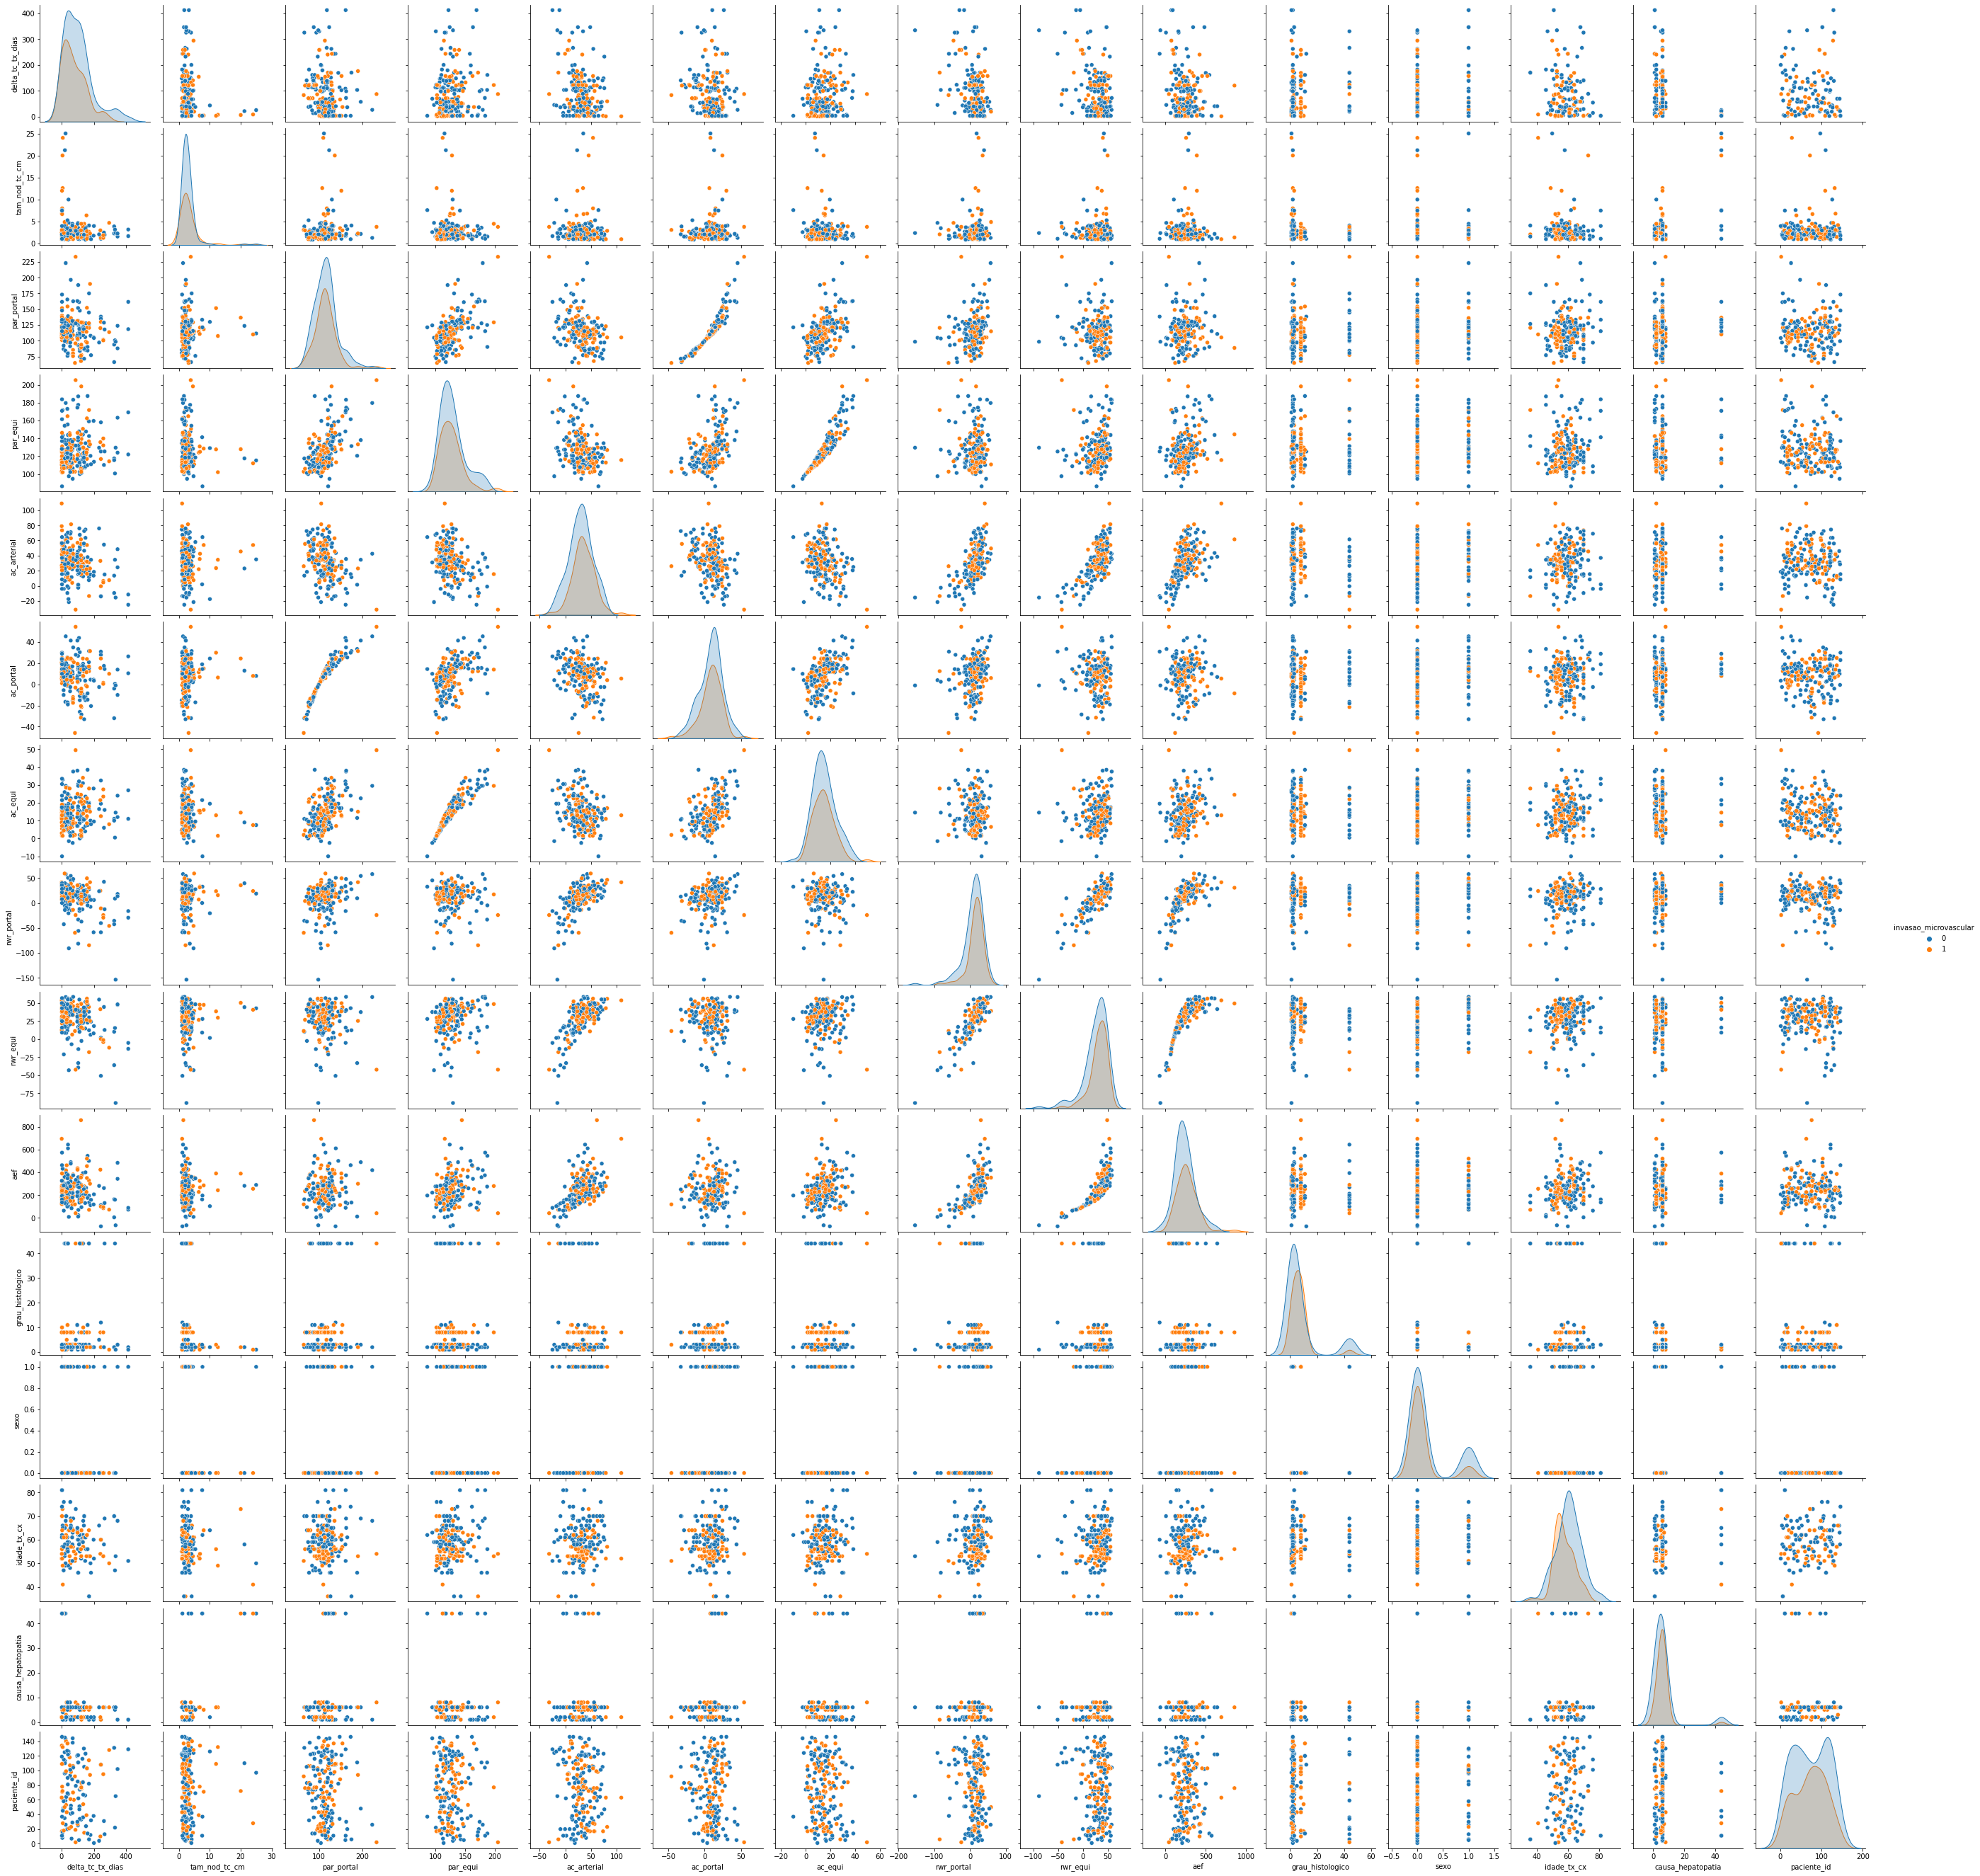

In [ ]:
sns.pairplot(dataset, hue="invasao_microvascular")

---

## Parte 2 - Regressão Logística

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy.special import expit

In [ ]:
s5 = pd.read_csv(root+'s5.csv')
# s5.invasao_microvascular = s5.invasao_microvascular.str.replace('ausente','0').replace('presente', '1').astype(int)

### Função para Obter se o paciente possui Invasão Microvascular

In [ ]:
def get_im(p: str):
  im = s5.invasao_microvascular[s5.paciente_id == p]
  if not im.empty:
    return im
  return 44 

In [ ]:
get_im(s5.paciente_id[0])

0    1
1    1
2    0
Name: invasao_microvascular, dtype: int64

### 1) invasao_microvascular e hc

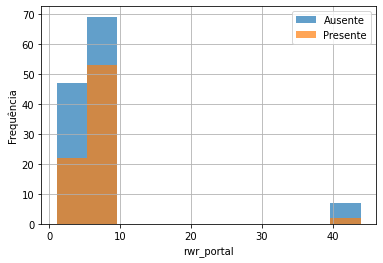

In [ ]:
s5.groupby([s5.invasao_microvascular]).causa_hepatopatia.hist(alpha=0.7)
plt.xlabel("rwr_portal")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.causa_hepatopatia)

-0.024361033180419177

Iremos usar 2/3 das amostras para treinar o modelo e 1/3 (0.33) para testar posteriormente.

In [ ]:
X = np.array(s5.invasao_microvascular).reshape(-1, 1)
y = np.array(s5.causa_hepatopatia)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Computando o caminho de regularização do modelo logístico:

In [ ]:
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.5454545454545454


In [ ]:
X = np.array(s5.invasao_microvascular).reshape(-1, 1)
y = np.array(s5.causa_hepatopatia)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.6166666666666667


In [ ]:
len(X), len(y), len(X_train), len(y_train), len(X_test), len(y_test), len(y_pred), len(reg.coef_), len(reg.intercept_)

(200, 200, 140, 140, 60, 60, 60, 8, 8)

Modelo de Regressão Linear




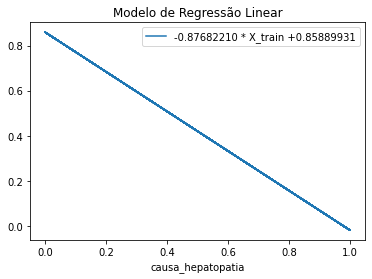

In [ ]:
plt.plot(X_test, reg.coef_[0,0] * X_test + reg.intercept_[0])
plt.legend([f'{reg.coef_[0,0]:0.8f} * X_train {reg.intercept_[0]:+0.8f}'])
plt.title("Modelo de Regressão Linear")
plt.xlabel("causa_hepatopatia")
plt.show()

Modelo de Regressão Logística

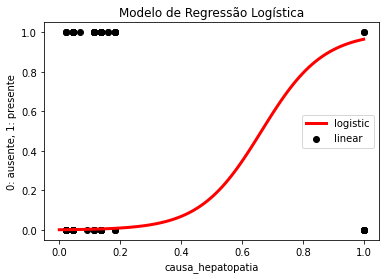

In [ ]:
# Regressão Logística
# linha reta com algum ruído Gaussiano
xmin, xmax = 0, 1
xmid = (xmax-xmin)/2
n_samples = 50
np.random.seed(0)
X_ = np.random.normal(size=n_samples)
y_ = (X_ > xmid).astype(float)
X_ += .3 * np.random.normal(size=n_samples)
X_ = X_[:, np.newaxis]
# Ajuste do classificador
clf_ = LogisticRegression(C=1e5)
clf_.fit(X_, y_)
plt.clf()
X_test_lin = np.linspace(xmin, xmax, 2*n_samples)
loss = expit(X_test_lin * clf_.coef_ + clf_.intercept_).ravel()
plt.plot(X_test_lin, loss, color='red', linewidth=3)

# Scatter plot
plt.scatter(s5.causa_hepatopatia/max(s5.causa_hepatopatia), s5.invasao_microvascular, color="black")

# Regressão Linear
#plt.plot(X_test, reg.coef_[0,0] * X_test + reg.intercept_[0] + 0.6)

plt.title('Modelo de Regressão Logística')
plt.legend(['logistic','linear','scatter'])
plt.xlabel("causa_hepatopatia")
plt.ylabel("0: ausente, 1: presente")
plt.show()

### 2) invasao_microvascular e delta_tc_tx_dias

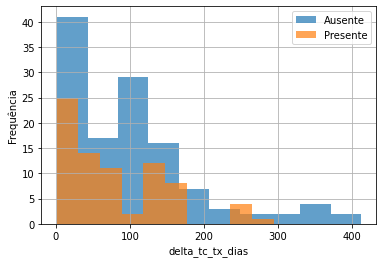

In [ ]:
s5.groupby([s5.invasao_microvascular]).delta_tc_tx_dias.hist(alpha=0.7)
plt.xlabel("delta_tc_tx_dias")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.delta_tc_tx_dias)

-0.1464511566954421

### 3) invasao_microvascular e tam_nod_tc_cm

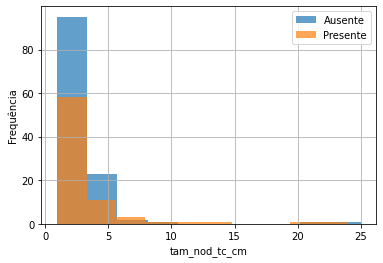

In [ ]:
s5.groupby([s5.invasao_microvascular]).tam_nod_tc_cm.hist(alpha=0.7)
plt.xlabel("tam_nod_tc_cm")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.tam_nod_tc_cm)

0.05962915710341921

### 4) invasao_microvascular e par_portal

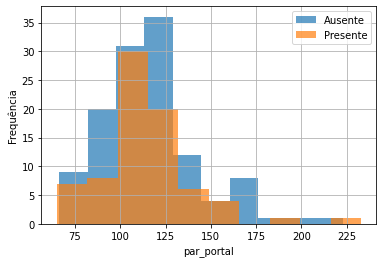

In [ ]:
s5.groupby([s5.invasao_microvascular]).par_portal.hist(alpha=0.7)
plt.xlabel("par_portal")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.par_portal)

-0.022426088785873655

### 5) invasao_microvascular e par_equi

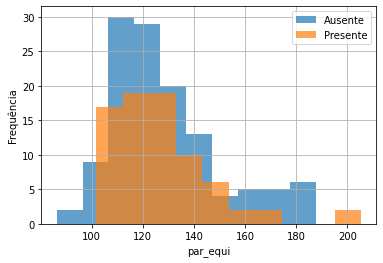

In [ ]:
s5.groupby([s5.invasao_microvascular]).par_equi.hist(alpha=0.7)
plt.xlabel("par_equi")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.par_equi)

-0.03409164153395732

### 6) invasao_microvascular e ac_arterial



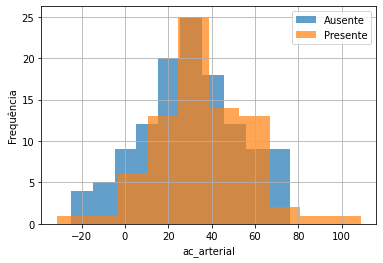

In [ ]:
s5.groupby([s5.invasao_microvascular]).ac_arterial.hist(alpha=0.7)
plt.xlabel("ac_arterial")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.ac_arterial)

0.12222923425901797

### 7) invasao_microvascular e ac_portal


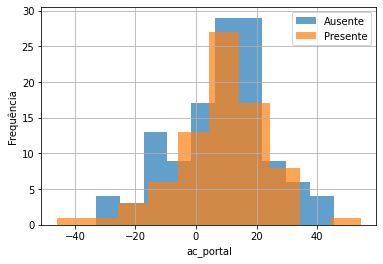

In [ ]:
s5.groupby([s5.invasao_microvascular]).ac_portal.hist(alpha=0.7)
plt.xlabel("ac_portal")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.ac_portal)

0.0051702574963351615

### 8) invasao_microvascular e ac_equi


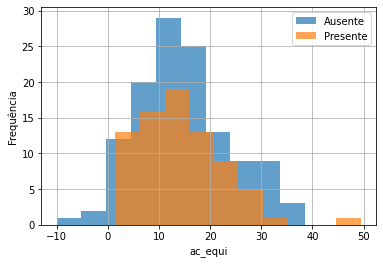

In [ ]:
s5.groupby([s5.invasao_microvascular]).ac_equi.hist(alpha=0.7)
plt.xlabel("ac_equi")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.ac_equi)

-0.013830505414079918

### 9) invasao_microvascular e rwr_portal


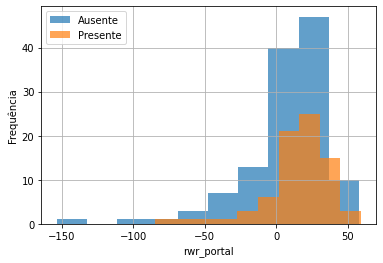

In [ ]:
s5.groupby([s5.invasao_microvascular]).rwr_portal.hist(alpha=0.7)
plt.xlabel("rwr_portal")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.rwr_portal)

0.12152074981531066

### 10) invasao_microvascular e rwr_equi


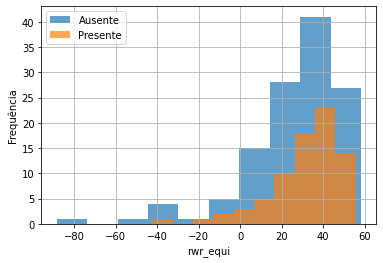

In [ ]:
s5.groupby([s5.invasao_microvascular]).rwr_equi.hist(alpha=0.7)
plt.xlabel("rwr_equi")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.rwr_equi)

0.1141513622513642

### 11) invasao_microvascular e aef

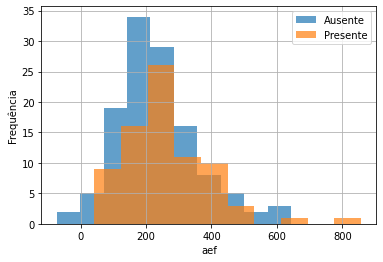

In [ ]:
s5.groupby([s5.invasao_microvascular]).aef.hist(alpha=0.7)
plt.xlabel("aef")
plt.ylabel("Frequência")
plt.legend(['Ausente','Presente'])
plt.show()

In [ ]:
s5.invasao_microvascular.corr(s5.aef)

0.11836817787165207

# Checando o conteúdo das pastas 

In [ ]:
# import glob
# files = []
# for file in glob.glob("*.jpeg"):
#     files.append(file)

In [ ]:
# import os
# root_img = 'drive/Shareddrives/MO286 - Visualização de Dados/data_images/'
# data = []
# for folder_0 in sorted(os.listdir(root_img)):
#   for folder_1 in sorted(os.listdir(root_img+folder_0)):
#     for folder_2 in sorted(os.listdir(root_img+folder_0+'/'+folder_1)):
#       if(folder_2[-4:] != '.pdf'):
#         for folder_3 in sorted(os.listdir('drive/Shareddrives/MO286 - Visualização de Dados/data_images/'+folder_0+'/'+folder_1+'/'+folder_2)):
#           data.append((folder_0, folder_1, folder_2,folder_3))

# df = pd.DataFrame(data, columns=['Folder_0', 'Folder_1','Folder_2','Img'])
# print (df.head)

In [ ]:
# df.groupby(['Folder_0','Folder_1','Folder_2']).count()

In [ ]:
# df.Folder_1.drop_duplicates()

In [ ]:
# root = 'drive/Shareddrives/MO286 - Visualização de Dados/data_csv/'
# mapping_names = pd.read_csv(root+'mapeamento_nomes.csv')

In [ ]:
# dffolder = df.Folder_1.drop_duplicates()
# dffolder = dffolder.tail(dffolder.shape[0] -1).to_frame()
# dffolder